# fourier transform

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 3/fourier.png',0)
# img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

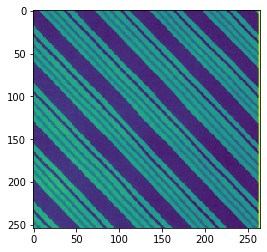

In [11]:
plt.imshow(img)

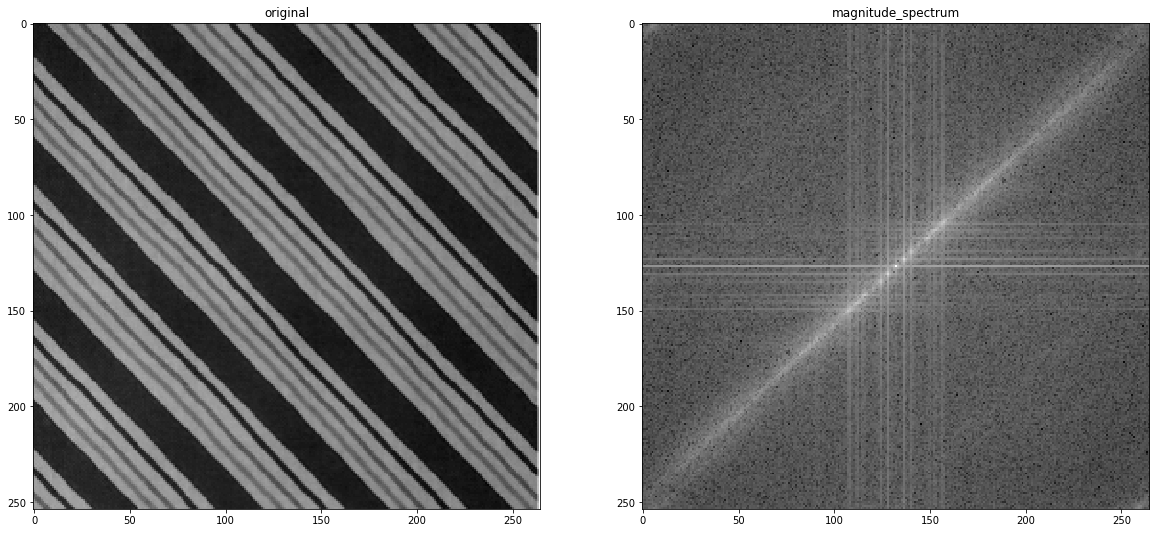

In [16]:
# dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) 

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

f,(ax1,ax4) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title('original')
ax1.imshow(img , cmap='gray')


ax4.set_title('magnitude_spectrum')
ax4.imshow(magnitude_spectrum ,cmap='gray')

# Hough line detection 

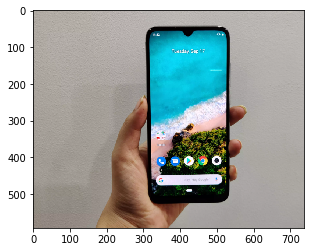

In [2]:
img = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 3/phone.png')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

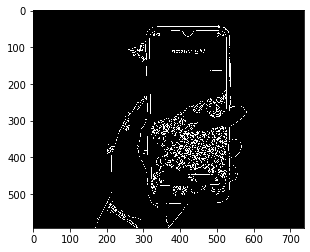

In [18]:
# convert it to gray scale 
gray = cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)

#define parameter for canny 
low_threshold  = 0
high_threshold = 220
edges = cv2.Canny(gray,low_threshold,high_threshold)
plt.imshow(edges,cmap='gray')

# find line by using Hough transform 

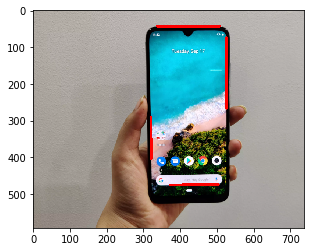

In [21]:
# Define the Hough transform parameter 

rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 5

lines = cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

line_image = np.copy(img_copy)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

plt.imshow(line_image)        